In [137]:
%matplotlib inline
#pacote para visualização gráfica
import matplotlib.pyplot as plt
#pacote para trabalhar com matrizes
from matplotlib.gridspec import GridSpec
import numpy as np
#pacote para importar e exportar dados e trabalhar comd dataframes
import pandas as pd
import seaborn as sns
def init_plotting(x=12,y=10):
    plt.rcParams['figure.figsize'] = (x,y)
    plt.rcParams['font.size'] = 30
    plt.rcParams['font.family'] = 'ubuntu'
    plt.rcParams['axes.labelsize'] = 0.8*plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 0.85*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.65*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = 0.8*plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = 0.8*plt.rcParams['font.size']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.loc'] = 'upper left'
    plt.rcParams['axes.linewidth'] = 1
    plt.rcParams["legend.edgecolor"] = 'white'
init_plotting()



In [2]:
etg = pd.read_table("/home/doug/Documentos/MEGA/Graduação/IC-Paulo/MIEGS/Coma_Analize/etg_MPA-JHU.dat", sep="\t")
netg = pd.read_csv("/home/doug/Documentos/MEGA/Graduação/IC-Paulo/MIEGS/Coma_Analize/netg_MPA-JHU.csv")
douglas = pd.read_csv("/home/doug/Documentos/MEGA/Graduação/IC-Paulo/MIEGS/Coma_Analize/possible_miegs-MPA-JHU.csv")
laurie = pd.read_csv("/home/doug/Documentos/MEGA/Graduação/IC-Paulo/MIEGS/Coma_Analize/miegs-MPA-JHU.csv")




In [3]:
etg_gr = etg.dered_g - etg.dered_r
netg_gr = netg.dered_g - netg.dered_r
douglas_gr = douglas.dered_g - douglas.dered_r
laurie_gr = laurie.dered_g - laurie.dered_r


/home/doug/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/doug/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/doug/anaconda3/lib/python3.7/site-packages/matplotlib/figure

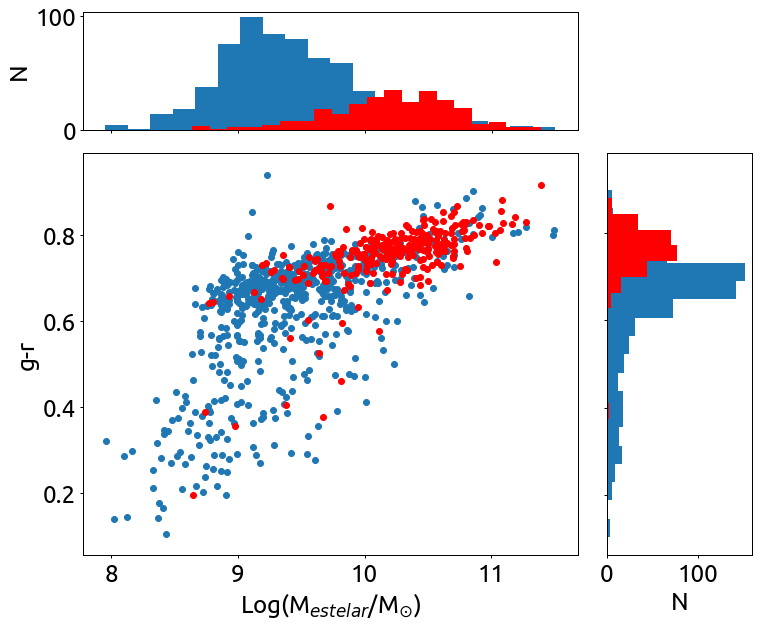

In [145]:
fig = plt.figure()
x = netg.alog_mass_tot; y = netg_gr
gs = GridSpec(4,4)
ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])
ax_joint.scatter(x,y)

ax_marg_x.hist(x, bins = 20)
ax_marg_y.hist(y,orientation="horizontal", bins = 20)
# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False); plt.setp(ax_marg_x.get_yticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False); plt.setp(ax_marg_y.get_xticklabels(), visible=False)
# Set labels on joint
#plt.label()

x = etg.alog_mass_tot; y = etg_gr
bx_joint = fig.add_subplot(gs[1:4,0:3])
bx_marg_x = fig.add_subplot(gs[0,0:3])
bx_marg_y = fig.add_subplot(gs[1:4,3])
bx_joint.scatter(x,y, color='red')


bx_marg_x.hist(x, color='red', bins = 20)
bx_marg_y.hist(y,orientation="horizontal", color='red', bins = 20)

# Turn off tick labels on marginals
plt.setp(bx_marg_x.get_xticklabels(), visible=False); plt.setp(bx_marg_x.get_yticklabels(), visible=True)
plt.setp(bx_marg_y.get_yticklabels(), visible=False); plt.setp(bx_marg_y.get_xticklabels(), visible=True)
# Set labels on joint
bx_joint.set_xlabel('Log(M$_{estelar}$/M$_{\odot}$)')
bx_joint.set_ylabel('g-r')
# Set labels on marginals
bx_marg_y.set_xlabel('N')
bx_marg_x.set_ylabel('N')
plt.savefig('/home/doug/Documentos/MEGA/Graduação/IC-Paulo/MIEGS/Coma_Analize/Graficos/M_vs_cor-MPA_JHU.jpeg')